In [1]:
import pandas as pd
import numpy as np
import os
import glob
from itertools import combinations
from collections import defaultdict
from random import sample
import random
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')
sns.set_theme(style="whitegrid")
#pandas max row
pd.set_option('display.max_rows', 500)

plt.rcParams['font.family'] = 'Times New Roman'

# GILON Activity

In [2]:
def read_files(file_list):
    file_list.sort()
    print(f"Total files: {len(file_list)}")
    all_results = []
    for file in file_list:
        df = pd.read_csv(file)
        all_results.append(df)
    return pd.concat(all_results)

In [3]:
gilon_activity_main_dir = 'dataset/importance_result_files_mine/gilon_activity/'
shufflenet_activity = glob.glob(gilon_activity_main_dir + 'shufflenet/*')
resnet_activity = glob.glob(gilon_activity_main_dir + 'resnet9/*')
mlpmixer_activity = glob.glob(gilon_activity_main_dir + 'mlpmixer/*')
simplevit_activity = glob.glob(gilon_activity_main_dir + 'simplevit/*')

shufflenet_activity_df = read_files(shufflenet_activity)
resnet_activity_df = read_files(resnet_activity)
mlpmixer_activity_df = read_files(mlpmixer_activity)
simplevit_activity_df = read_files(simplevit_activity)



Total files: 6
Total files: 6
Total files: 6
Total files: 5


In [4]:
def get_mean_std(df):
    print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').mean()['accuracy'])
    print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').std()['accuracy'])

In [5]:
get_mean_std(shufflenet_activity_df)
get_mean_std(resnet_activity_df)
get_mean_std(mlpmixer_activity_df)
get_mean_std(simplevit_activity_df)

opl_loss
False    0.957756
True     0.945206
Name: accuracy, dtype: float64
opl_loss
False    0.006584
True     0.008912
Name: accuracy, dtype: float64
opl_loss
False    0.960291
True     0.940318
Name: accuracy, dtype: float64
opl_loss
False    0.004846
True     0.035085
Name: accuracy, dtype: float64
opl_loss
False    0.919630
True     0.921885
Name: accuracy, dtype: float64
opl_loss
False    0.003224
True     0.003486
Name: accuracy, dtype: float64
opl_loss
False    0.922446
True     0.923888
Name: accuracy, dtype: float64
opl_loss
False    0.017620
True     0.010536
Name: accuracy, dtype: float64


/tmp/ipykernel_241585/1407426385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').mean()['accuracy'])
/tmp/ipykernel_241585/1407426385.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').std()['accuracy'])
/tmp/ipykernel_241585/1407426385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

In [6]:
def calculate_area_between_two_lines(df):
    df = df.groupby(['exp_num','exp_type','opl_loss'])['accuracy','feature_order'].mean().reset_index()
    area_unimportant = np.trapz(df[(df['exp_type']=='unimportant') & (df['opl_loss']==False)].accuracy, df[(df['exp_type']=='unimportant') & (df['opl_loss']==False)].feature_order)
    area_important = np.trapz(df[(df['exp_type']=='important') & (df['opl_loss']==False)].accuracy, df[(df['exp_type']=='important') & (df['opl_loss']==False)].feature_order)
    area_between = area_unimportant - area_important
    print(f"Area between unimportant and important: {area_between}")
    area_unimportant_qr = np.trapz(df[(df['exp_type']=='unimportant') & (df['opl_loss']==True)].accuracy, df[(df['exp_type']=='unimportant') & (df['opl_loss']==True)].feature_order)
    area_important_qr = np.trapz(df[(df['exp_type']=='important') & (df['opl_loss']==True)].accuracy, df[(df['exp_type']=='important') & (df['opl_loss']==True)].feature_order)
    area_between_qr = area_unimportant_qr - area_important_qr
    print(f"Area between QR unimportant and QR important: {area_between_qr}")

    return area_between, area_between_qr

In [7]:
def plot_subplots(df, model_name, task_name):
    # create two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 3), 
                                   gridspec_kw={'wspace':0.1},
                                    constrained_layout=True, sharey=False)
    title_font_size = 18 

    sns.lineplot(data=df[(df['exp_type']=='unimportant') & (df['opl_loss']==False)], x="feature_order", y="accuracy", 
                errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=0.9,)

    sns.lineplot(data=df[(df['exp_type']=='important') & (df['opl_loss']==False)], x="feature_order", y="accuracy",
                                            errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=0.9)

    # thick lines
    sns.lineplot(data=df[(df['exp_type']=='unimportant')  & (df['opl_loss']==True)], x="feature_order", y="accuracy",
                                            errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[1],linewidth=3)
    # sns.lineplot(data=shuffle_opl[shuffle_opl['exp_type']=='random'], x="feature_order", y="accuracy",
    #                                         ci='sd', label='CE+Ortho (random)', color='black', linestyle='-.', ax=axes[1],linewidth=3, alpha=0.2)
    sns.lineplot(data=df[(df['exp_type']=='important')& (df['opl_loss']==True)], x="feature_order", y="accuracy", 
                                            errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[1],linewidth=3)
    # set legend only for the first plot, make line thicker
    axes[0].legend(title='', loc='lower left', fontsize=12, )
    axes[1].legend(title='', loc='lower left', fontsize=12, )
    # set title
    axes[0].set_title(f"{model_name} (CE)", fontsize=title_font_size)
    axes[1].set_title(f"{model_name} (CE+QR Sparsity)", fontsize=title_font_size)
    # remove y tick for axes[1]
    axes[1].set_yticklabels([])
    # remove label
    axes[0].set_ylabel('Accuracy', fontsize=16)
    axes[1].set_ylabel('')
    
    for i in range(2):
        axes[i].grid(True)
        axes[i].set_xlabel('Removed Feature', fontsize=16)

        axes[i].set_ylim(0.65, 1.0)
        axes[i].spines[["top"]].set_visible(False)
        axes[i].tick_params(axis='x', labelsize=14)
    # calculate the area between two lines using trapezoidal rule 
    area_between, area_between_qr = calculate_area_between_two_lines(df)

    #shade the area between two lines
    # axes[0].fill_between(df[(df['exp_type']=='unimportant') & (df['opl_loss']==False)].feature_order,
    #                     df[(df['exp_type']=='unimportant') & (df['opl_loss']==False)].accuracy,
    #                     df[(df['exp_type']=='important') & (df['opl_loss']==False)].accuracy,
    #                     color='yellow', alpha=0.05)
    

    # add a pseudo legend like a box for area_between
    axes[0].plot(0, 0, label=f"ABC: {area_between:.2f}", alpha=0.2,color='black', linewidth=3)
    axes[0].legend(title='', loc='lower left', fontsize=12, )
    # add a pseudo legend like a box for area_between_qr
    axes[1].plot(0, 0, label=f"ABC: {area_between_qr:.2f}", alpha=0.2,color='black', linewidth=3)
    axes[1].legend(title='', loc='lower left', fontsize=12, )
    
    # save
    plt.savefig(f'results/roar/{model_name}_{task_name}.png', dpi=300, bbox_inches='tight')

/tmp/ipykernel_241585/788389471.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type','opl_loss'])['accuracy','feature_order'].mean().reset_index()
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


Area between unimportant and important: 0.6845507388472605
Area between QR unimportant and QR important: 1.2270186987884308


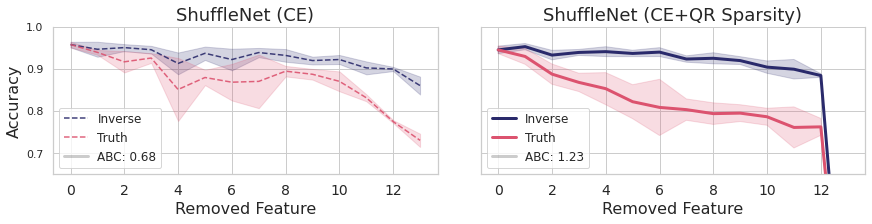

In [8]:
plot_subplots(shufflenet_activity_df, 'ShuffleNet', 'GilonActivity')

/tmp/ipykernel_241585/788389471.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type','opl_loss'])['accuracy','feature_order'].mean().reset_index()


Area between unimportant and important: 0.8009944673996774
Area between QR unimportant and QR important: 1.1635968905385514


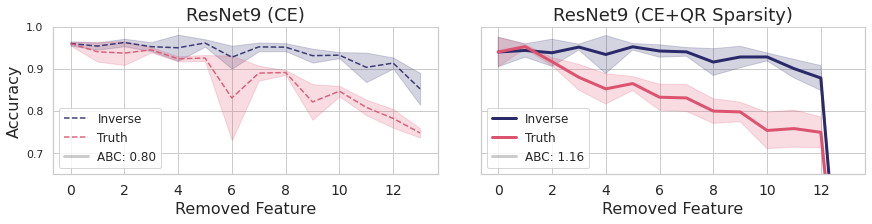

In [9]:
plot_subplots(resnet_activity_df, 'ResNet9', 'GilonActivity')

/tmp/ipykernel_241585/788389471.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type','opl_loss'])['accuracy','feature_order'].mean().reset_index()


Area between unimportant and important: 0.9202395125709071
Area between QR unimportant and QR important: 1.1442257861194758


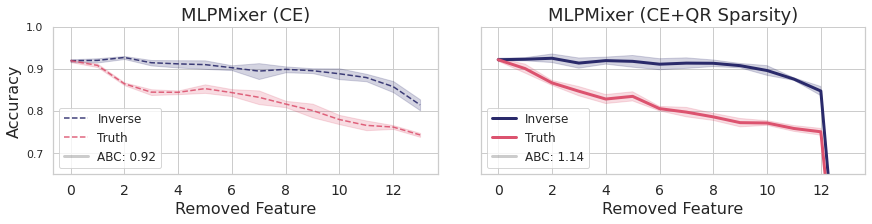

In [10]:
plot_subplots(mlpmixer_activity_df, 'MLPMixer', 'GilonActivity')

/tmp/ipykernel_241585/788389471.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type','opl_loss'])['accuracy','feature_order'].mean().reset_index()


Area between unimportant and important: 0.5530359268856362
Area between QR unimportant and QR important: 0.6362770502136001


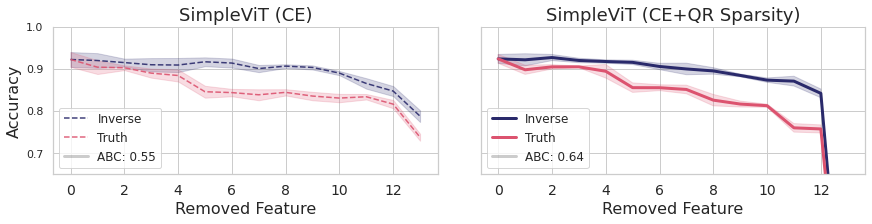

In [11]:
plot_subplots(simplevit_activity_df, 'SimpleViT', 'GilonActivity')

In [12]:
shufflenet_gilon_qr_true = shufflenet_activity_df[shufflenet_activity_df['opl_loss']==True]
shufflenet_gilon_qr_false = shufflenet_activity_df[shufflenet_activity_df['opl_loss']==False]
resnet_gilon_qr_true = resnet_activity_df[resnet_activity_df['opl_loss']==True]
resnet_gilon_qr_false = resnet_activity_df[resnet_activity_df['opl_loss']==False]
mlpmixer_gilon_qr_true = mlpmixer_activity_df[mlpmixer_activity_df['opl_loss']==True]
mlpmixer_gilon_qr_false = mlpmixer_activity_df[mlpmixer_activity_df['opl_loss']==False]
simplevit_gilon_qr_true = simplevit_activity_df[simplevit_activity_df['opl_loss']==True]
simplevit_gilon_qr_false = simplevit_activity_df[simplevit_activity_df['opl_loss']==False]

In [13]:
gilon_data = {1: [shufflenet_gilon_qr_false, shufflenet_gilon_qr_true, 'ShuffleNet'],
                2: [resnet_gilon_qr_false, resnet_gilon_qr_true, 'ResNet9'],
                3: [mlpmixer_gilon_qr_false, mlpmixer_gilon_qr_true, 'MLPMixer'],
                4: [simplevit_gilon_qr_false, simplevit_gilon_qr_true, 'SimpleViT']}

In [14]:
def calculate_area_between_two_lines_one_file(df):
    df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
    area_unimportant = np.trapz(df[df['exp_type']=='unimportant'].accuracy, df[df['exp_type']=='unimportant'].feature_order) 
    area_important = np.trapz(df[df['exp_type']=='important'].accuracy, df[df['exp_type']=='important'].feature_order)
    area_between = area_unimportant - area_important
    print(f"Area between unimportant and important: {area_between}")

    return area_between

/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

Area between unimportant and important: 0.6845507388472605
Area between unimportant and important: 0.8009944673996774
Area between unimportant and important: 0.9202395125709071
Area between unimportant and important: 0.5530359268856362


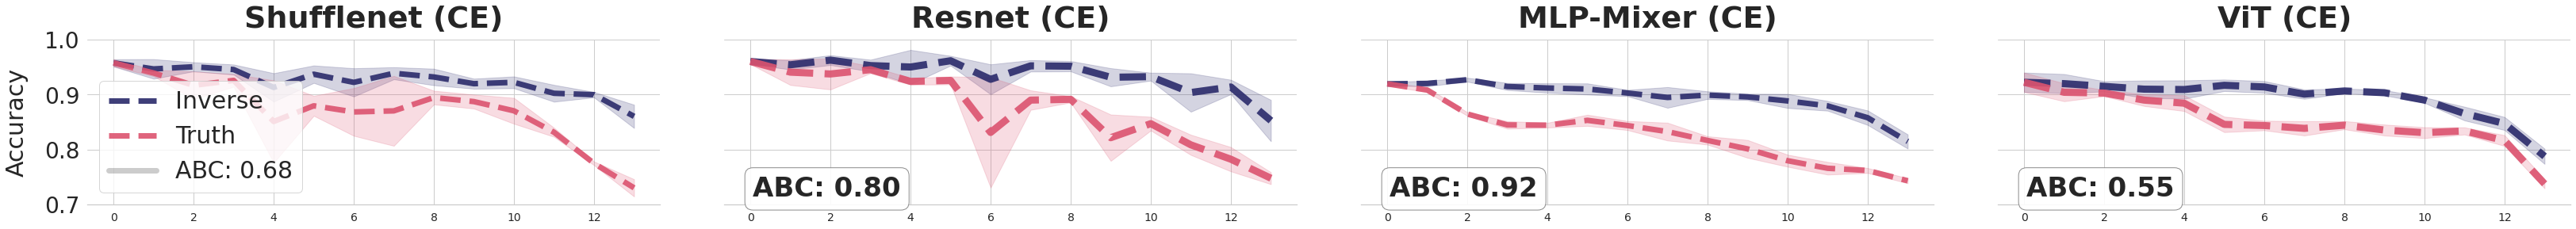

In [21]:

fig, axes = plt.subplots(1, 4, figsize=(45, 3.9), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 38 
linewidth = 9
dashlinewidth = 7

sns.lineplot(data=gilon_data[1][0][gilon_data[1][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=gilon_data[1][0][gilon_data[1][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)

# # thick lines
sns.lineplot(data=gilon_data[2][0][gilon_data[2][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[2][0][gilon_data[2][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1],linewidth=linewidth, alpha=0.9)

sns.lineplot(data=gilon_data[3][0][gilon_data[3][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=gilon_data[3][0][gilon_data[3][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=gilon_data[4][0][gilon_data[4][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[4][0][gilon_data[4][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3],linewidth=linewidth, alpha=0.9)


area_between_1 = calculate_area_between_two_lines_one_file(gilon_data[1][0])
area_between_2 = calculate_area_between_two_lines_one_file(gilon_data[2][0])
area_between_3 = calculate_area_between_two_lines_one_file(gilon_data[3][0])
area_between_4 = calculate_area_between_two_lines_one_file(gilon_data[4][0])

area_lists = [area_between_1, area_between_2, area_between_3, area_between_4]
title_lists = ['Shufflenet (CE)', 'Resnet (CE)', 'MLP-Mixer (CE)', 'ViT (CE)']

for j in range(4):
      
      axes[j].set_xlabel('Removed Features', fontsize=16)
      axes[j].set_ylim(0.7, 1.0)
      axes[j].spines[["top"]].set_visible(False)
      axes[j].tick_params(axis='x', labelsize=14)
      # add a pseudo legend like a box for area_between
      axes[j].plot(0, 0, label=f"ABC: {area_lists[j]:.2f}", alpha=0.2,color='black', linewidth=3)
      axes[j].legend(title='', loc='lower left', fontsize=30, )
      leg = axes[j].get_legend()
      for line in leg.get_lines():
            line.set_linewidth(7)
      # set x ticks
      axes[j].set_xticks([0, 2, 4, 6, 8, 10, 12])
      # set y ticks
      axes[j].set_yticks([0.7, 0.8, 0.9, 1.0])
      axes[j].set_ylabel('')
      # remove x tick labels and labels
      # axes[i][j].set_xticklabels([])


      axes[j].set_title(title_lists[j], fontsize=title_font_size, pad=15, fontweight='bold')
      # remove first and second legend entry
      if j in [0]:
            pass 
      else:
            # remove legend
            axes[j].legend_.remove()
            # use annotate to add legend on bottom left
            axes[j].annotate(f"ABC: {area_lists[j]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=34, fontweight='bold',
                              bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
      axes[j].set_xlabel('')

      if j == 0:
            axes[j].set_ylabel('Accuracy', fontsize=30, labelpad=20)
            axes[j].set_yticklabels([0.7, 0.8, 0.9, 1.0], fontsize=28)
      else:
            axes[j].set_ylabel('')
            axes[j].set_yticklabels([])
      # remove top left right spine
      axes[j].spines[["top", "right", "left"]].set_visible(False)

plt.savefig('results/roar/Paper_GILON_mine.png', dpi=300, bbox_inches='tight')



/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_241585/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

Area between unimportant and important: 1.2270186987884308
Area between unimportant and important: 1.1635968905385514
Area between unimportant and important: 1.1442257861194758
Area between unimportant and important: 0.6362770502136001


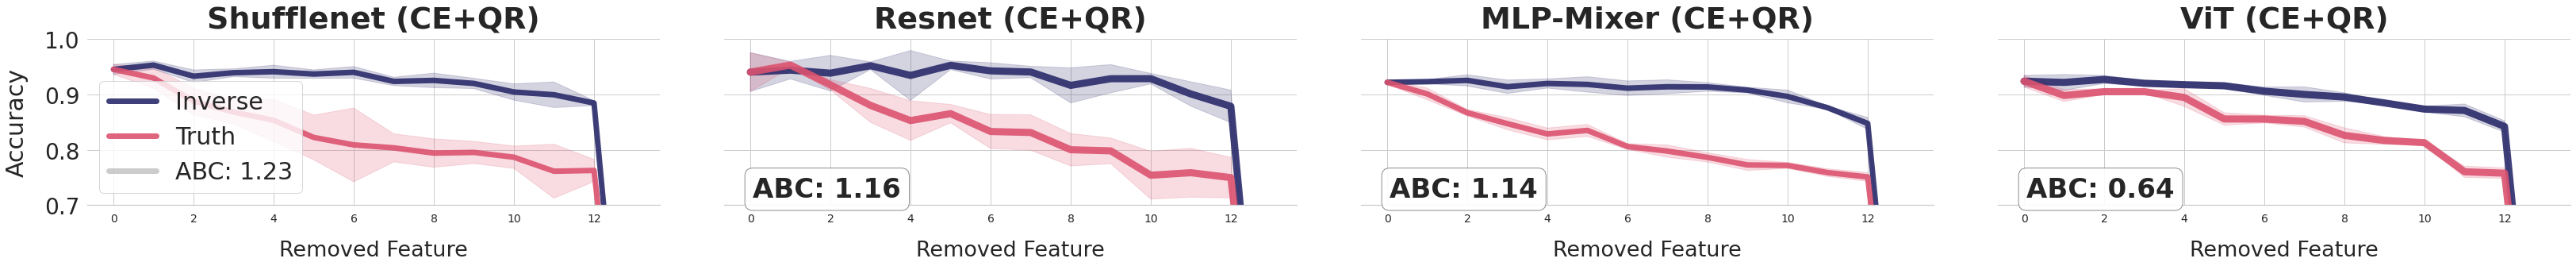

In [22]:

fig, axes = plt.subplots(1, 4, figsize=(45, 4.55), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 38 
linewidth = 9
dashlinewidth = 7

sns.lineplot(data=gilon_data[1][1][gilon_data[1][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[1][1][gilon_data[1][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=gilon_data[2][1][gilon_data[2][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[2][1][gilon_data[2][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[1],linewidth=linewidth, alpha=0.9)        

sns.lineplot(data=gilon_data[3][1][gilon_data[3][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[3][1][gilon_data[3][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[4][1][gilon_data[4][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[4][1][gilon_data[4][1]['exp_type']=='important'], x="feature_order", y="accuracy", 
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[3],linewidth=linewidth, alpha=0.9)


area_between_1 = calculate_area_between_two_lines_one_file(gilon_data[1][1])
area_between_2 = calculate_area_between_two_lines_one_file(gilon_data[2][1])
area_between_3 = calculate_area_between_two_lines_one_file(gilon_data[3][1])
area_between_4 = calculate_area_between_two_lines_one_file(gilon_data[4][1])

area_lists = [area_between_1, area_between_2, area_between_3, area_between_4]
title_lists = ['Shufflenet (CE+QR)', 'Resnet (CE+QR)', 'MLP-Mixer (CE+QR)', 'ViT (CE+QR)']

for j in range(4):
      # remove legend
      axes[j].legend().remove()
      
      axes[j].set_xlabel('Removed Features', fontsize=16)
      axes[j].set_ylim(0.7, 1.0)
      axes[j].spines[["top"]].set_visible(False)
      axes[j].tick_params(axis='x', labelsize=14)
      # add a pseudo legend like a box for area_between
      axes[j].plot(0, 0, label=f"ABC: {area_lists[j]:.2f}", alpha=0.2,color='black', linewidth=3)
      axes[j].legend(title='', loc='lower left', fontsize=30, )
      leg = axes[j].get_legend()
      for line in leg.get_lines():
            line.set_linewidth(7)
      if j in [0]:
            pass 
      else:
            # remove legend
            axes[j].legend().remove()
            axes[j].annotate(f"ABC: {area_lists[j]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=34, fontweight='bold',
                              bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
      # set x ticks
      axes[j].set_xticks([0, 2, 4, 6, 8, 10, 12])
      # set y ticks
      axes[j].set_yticks([0.7, 0.8, 0.9, 1.0])
      axes[j].set_ylabel('')
      # remove x tick labels and labels
      # axes[i][j].set_xticklabels([])

      axes[j].set_title(title_lists[j], fontsize=title_font_size, pad=15, fontweight='bold')
      # handles, labels = axes[j].get_legend_handles_labels()
      # axes[j].legend(handles[2:], labels[2:], title='', loc='lower left', fontsize=30)
      # leg = axes[j].get_legend()
      # for line in leg.get_lines():
      #       line.set_linewidth(5)
      axes[j].set_xlabel('Removed Feature', fontsize=27, labelpad=20)

      if j == 0:
            axes[j].set_ylabel('Accuracy', fontsize=30, labelpad=20)
            axes[j].set_yticklabels([0.7, 0.8, 0.9, 1.0], fontsize=28)
      else:
            axes[j].set_ylabel('')
            axes[j].set_yticklabels([])
      # remove top left right spine
      axes[j].spines[["top", "right", "left"]].set_visible(False)
      # annotate
      # axes[j].annotate('A', xy=(0.01, 0.95), xycoords='axes fraction', fontsize=40, fontweight='bold')


plt.savefig('results/roar/Paper_GILON_mine2.png', dpi=300, bbox_inches='tight')



/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

Area between unimportant and important: 0.6845507388472605
Area between unimportant and important: 1.2270186987884308
Area between unimportant and important: 0.8009944673996774
Area between unimportant and important: 1.1635968905385514
Area between unimportant and important: 0.9202395125709071
Area between unimportant and important: 1.1442257861194758
Area between unimportant and important: 0.5530359268856362
Area between unimportant and important: 0.6362770502136001


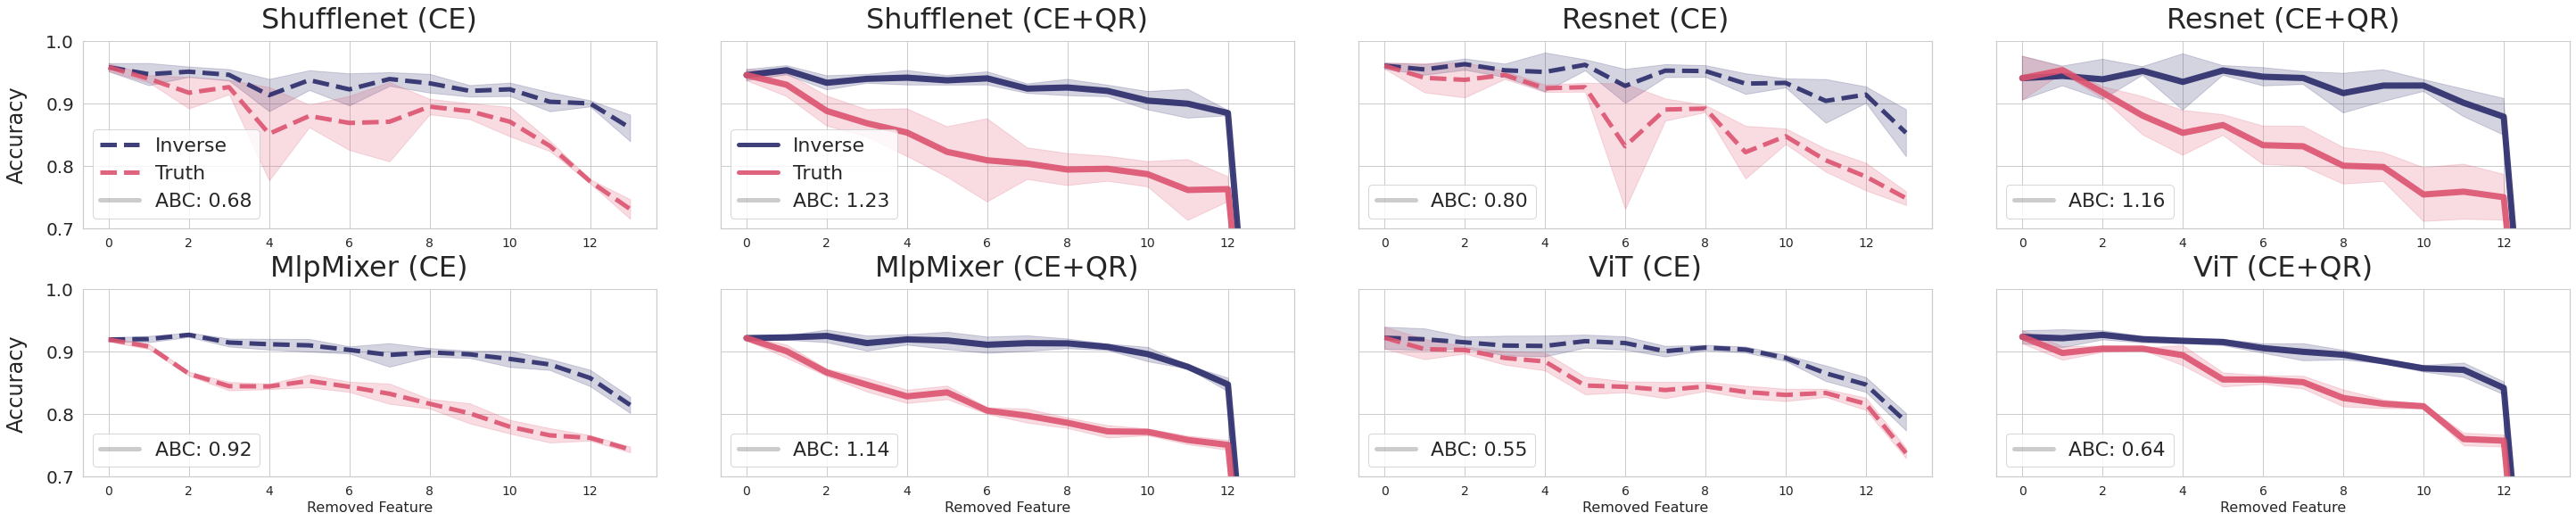

In [18]:

fig, axes = plt.subplots(2, 4, figsize=(40, 8), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 32 
linewidth = 7
dashlinewidth = 5

sns.lineplot(data=gilon_data[1][0][gilon_data[1][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0][0], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=gilon_data[1][0][gilon_data[1][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0][0], alpha=0.9,linewidth=dashlinewidth)

# # thick lines
sns.lineplot(data=gilon_data[1][1][gilon_data[1][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[0][1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[1][1][gilon_data[1][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[0][1],linewidth=linewidth, alpha=0.9)

sns.lineplot(data=gilon_data[2][0][gilon_data[2][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0][2], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=gilon_data[2][0][gilon_data[2][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0][2], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=gilon_data[2][1][gilon_data[2][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[0][3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[2][1][gilon_data[2][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[0][3],linewidth=linewidth, alpha=0.9)

sns.lineplot(data=gilon_data[3][0][gilon_data[3][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1][0], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[3][0][gilon_data[3][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1][0], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=gilon_data[3][1][gilon_data[3][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[1][1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[3][1][gilon_data[3][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[1][1],linewidth=linewidth, alpha=0.9)        

sns.lineplot(data=gilon_data[4][0][gilon_data[4][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1][2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[4][0][gilon_data[4][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1][2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=gilon_data[4][1][gilon_data[4][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[1][3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=gilon_data[4][1][gilon_data[4][1]['exp_type']=='important'], x="feature_order", y="accuracy", 
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[1][3],linewidth=linewidth, alpha=0.9)



area_between_1 = calculate_area_between_two_lines_one_file(gilon_data[1][0])
area_between_2 = calculate_area_between_two_lines_one_file(gilon_data[1][1])
area_between_3 = calculate_area_between_two_lines_one_file(gilon_data[2][0])
area_between_4 = calculate_area_between_two_lines_one_file(gilon_data[2][1])
area_between_5 = calculate_area_between_two_lines_one_file(gilon_data[3][0])
area_between_6 = calculate_area_between_two_lines_one_file(gilon_data[3][1])
area_between_7 = calculate_area_between_two_lines_one_file(gilon_data[4][0])
area_between_8 = calculate_area_between_two_lines_one_file(gilon_data[4][1])

area_lists = [[area_between_1, area_between_2, area_between_3, area_between_4],
                [area_between_5, area_between_6, area_between_7, area_between_8]]
title_lists = [['Shufflenet (CE)', 'Shufflenet (CE+QR)', 'Resnet (CE)', 'Resnet (CE+QR)'],
               ['MlpMixer (CE)', 'MlpMixer (CE+QR)', 'ViT (CE)', 'ViT (CE+QR)']]

for i in range(2):
        for j in range(4):
            
            axes[i][j].set_xlabel('Removed Feature', fontsize=16)
            axes[i][j].set_ylim(0.7, 1.0)
            axes[i][j].spines[["top"]].set_visible(False)
            axes[i][j].tick_params(axis='x', labelsize=14)
            # add a pseudo legend like a box for area_between
            axes[i][j].plot(0, 0, label=f"ABC: {area_lists[i][j]:.2f}", alpha=0.2,color='black', linewidth=3)
            axes[i][j].legend(title='', loc='lower left', fontsize=22, )
            leg = axes[i][j].get_legend()
            for line in leg.get_lines():
                  line.set_linewidth(5)
            # set x ticks
            axes[i][j].set_xticks([0, 2, 4, 6, 8, 10, 12])
            # set y ticks
            axes[i][j].set_yticks([0.7, 0.8, 0.9, 1.0])
            axes[i][j].set_ylabel('')
            # remove x tick labels and labels
            # axes[i][j].set_xticklabels([])

            axes[i][j].set_title(title_lists[i][j], fontsize=title_font_size, pad=15)
            # remove first and second legend entry
            if i ==0 and j in [0, 1]:
                  pass 
            else:
                  handles, labels = axes[i][j].get_legend_handles_labels()
                  axes[i][j].legend(handles[2:], labels[2:], title='', loc='lower left', fontsize=22, )
                  leg = axes[i][j].get_legend()
                  for line in leg.get_lines():
                        line.set_linewidth(5)
            if i == 0:
                  # remove x labels
                    axes[i][j].set_xlabel('')

            if j == 0:
                axes[i][j].set_ylabel('Accuracy', fontsize=24, labelpad=20)
                axes[i][j].set_yticklabels([0.7, 0.8, 0.9, 1.0], fontsize=20)
            else:
                axes[i][j].set_ylabel('')
                axes[i][j].set_yticklabels([])


plt.savefig('results/roar/Paper_GILON_mine.png', dpi=300, bbox_inches='tight')



# MS New

In [19]:
# gilon_speed_main_dir = '../importance_result_files/gilon_speed/'
# shufflenet_speed = glob.glob(gilon_speed_main_dir + 'shufflenet/*')
# resnet_speed = glob.glob(gilon_speed_main_dir + 'resnet/*')
# mlpmixer_speed = glob.glob(gilon_speed_main_dir + 'mlpmixer/*')
# simplevit_speed = glob.glob(gilon_speed_main_dir + 'simplevit/*')

# shufflenet_speed_df = read_files(shufflenet_speed)

microsoft_main_dir = 'dataset/importance_result_files_mine/microsoft_activity_new/'
shufflenet_ms = glob.glob(microsoft_main_dir + 'shufflenet/*')
resnet_ms = glob.glob(microsoft_main_dir + 'resnet9/*')
mlpmixer_ms = glob.glob(microsoft_main_dir + 'mlpmixer/*')
simplevit_ms = glob.glob(microsoft_main_dir + 'simplevit/*')

shufflenet_ms_df = read_files(shufflenet_ms)
resnet_ms_df = read_files(resnet_ms)
mlpmixer_ms_df = read_files(mlpmixer_ms)
simplevit_ms_df = read_files(simplevit_ms)

Total files: 4
Total files: 4
Total files: 4
Total files: 4


In [20]:
shufflenet_ms_qr_true = shufflenet_ms_df[shufflenet_ms_df['opl_loss']==True]
shufflenet_ms_qr_false = shufflenet_ms_df[shufflenet_ms_df['opl_loss']==False]
resnet_ms_qr_true = resnet_ms_df[resnet_ms_df['opl_loss']==True]
resnet_ms_qr_false = resnet_ms_df[resnet_ms_df['opl_loss']==False]
mlpmixer_ms_qr_true = mlpmixer_ms_df[mlpmixer_ms_df['opl_loss']==True]
mlpmixer_ms_qr_false = mlpmixer_ms_df[mlpmixer_ms_df['opl_loss']==False]
simplevit_ms_qr_true = simplevit_ms_df[simplevit_ms_df['opl_loss']==True]
simplevit_ms_qr_false = simplevit_ms_df[simplevit_ms_df['opl_loss']==False]

In [21]:
ms_data = {1: [shufflenet_ms_qr_false, shufflenet_ms_qr_true, 'ShuffleNet'],
                2: [resnet_ms_qr_false, resnet_ms_qr_true, 'ResNet9'],
                3: [mlpmixer_ms_qr_false, mlpmixer_ms_qr_true, 'MLPMixer'],
                4: [simplevit_ms_qr_false, simplevit_ms_qr_true, 'SimpleViT']}

In [22]:
ms_area_between_1 = calculate_area_between_two_lines_one_file(ms_data[1][0])
ms_area_between_2 = calculate_area_between_two_lines_one_file(ms_data[1][1])
ms_area_between_3 = calculate_area_between_two_lines_one_file(ms_data[2][0])
ms_area_between_4 = calculate_area_between_two_lines_one_file(ms_data[2][1])
ms_area_between_5 = calculate_area_between_two_lines_one_file(ms_data[3][0])
ms_area_between_6 = calculate_area_between_two_lines_one_file(ms_data[3][1])
ms_area_between_7 = calculate_area_between_two_lines_one_file(ms_data[4][0])
ms_area_between_8 = calculate_area_between_two_lines_one_file(ms_data[4][1])

Area between unimportant and important: 0.3551828346932604
Area between unimportant and important: 0.3376246600181321
Area between unimportant and important: 0.1758235116349347
Area between unimportant and important: 0.11792082200060383
Area between unimportant and important: 0.12568751888788254
Area between unimportant and important: 0.27633726201269226
Area between unimportant and important: -0.05430643699002724
Area between unimportant and important: 0.12801450589301933


/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

In [23]:
get_mean_std(shufflenet_ms_df)
get_mean_std(resnet_ms_df)
get_mean_std(mlpmixer_ms_df)
get_mean_std(simplevit_ms_df)

opl_loss
False    0.845814
True     0.810094
Name: accuracy, dtype: float64
opl_loss
False    0.045857
True     0.021764
Name: accuracy, dtype: float64
opl_loss
False    0.752070
True     0.787307
Name: accuracy, dtype: float64
opl_loss
False    0.058678
True     0.050993
Name: accuracy, dtype: float64
opl_loss
False    0.735932
True     0.726080
Name: accuracy, dtype: float64
opl_loss
False    0.038585
True     0.037639
Name: accuracy, dtype: float64
opl_loss
False    0.702690
True     0.706256
Name: accuracy, dtype: float64
opl_loss
False    0.055093
True     0.087698
Name: accuracy, dtype: float64


/tmp/ipykernel_218711/1407426385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').mean()['accuracy'])
/tmp/ipykernel_218711/1407426385.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df[(df['feature_order']==0) & (df['exp_type']=='important')].groupby('opl_loss').std()['accuracy'])
/tmp/ipykernel_218711/1407426385.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only colu

/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

Area between unimportant and important: 0.3551828346932604
Area between unimportant and important: 0.1758235116349347
Area between unimportant and important: 0.12568751888788254
Area between unimportant and important: -0.05430643699002724


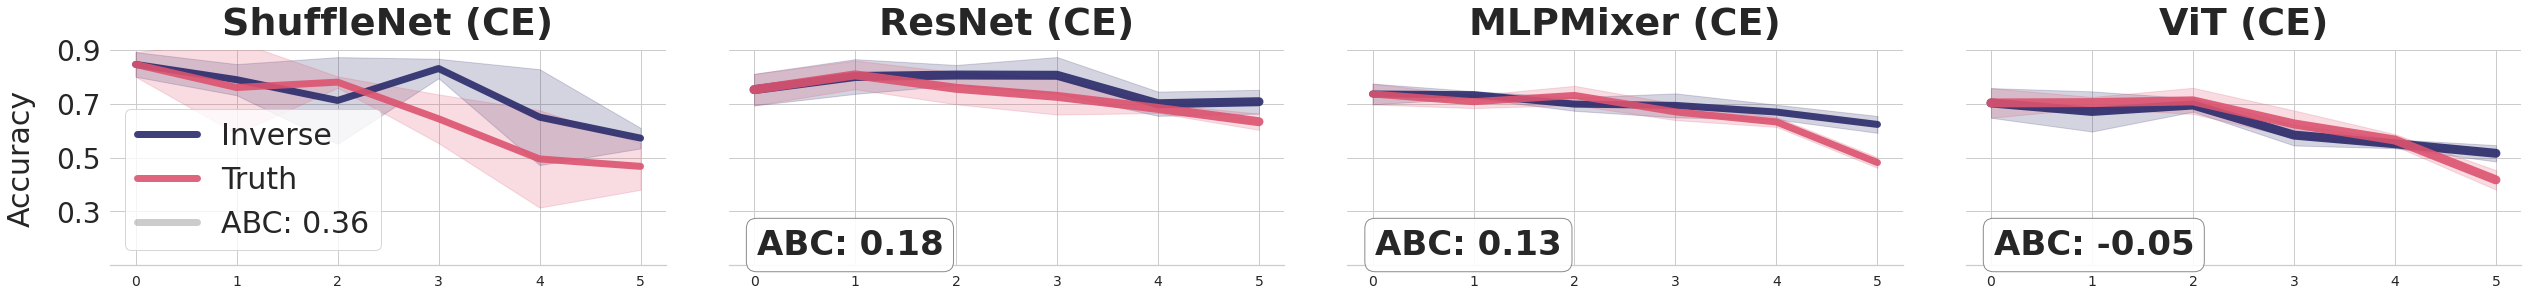

In [24]:

fig, axes = plt.subplots(1, 4, figsize=(35, 4), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 38 
linewidth = 9
dashlinewidth = 7

sns.lineplot(data=ms_data[1][0][ms_data[1][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=ms_data[1][0][ms_data[1][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)

# # thick lines
sns.lineplot(data=ms_data[2][0][ms_data[2][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=ms_data[2][0][ms_data[2][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[1],linewidth=linewidth, alpha=0.9)

sns.lineplot(data=ms_data[3][0][ms_data[3][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy", 
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)

sns.lineplot(data=ms_data[3][0][ms_data[3][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=ms_data[4][0][ms_data[4][0]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='-', ax=axes[3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=ms_data[4][0][ms_data[4][0]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='-', ax=axes[3],linewidth=linewidth, alpha=0.9)


area_between_1 = calculate_area_between_two_lines_one_file(ms_data[1][0])
area_between_2 = calculate_area_between_two_lines_one_file(ms_data[2][0])
area_between_3 = calculate_area_between_two_lines_one_file(ms_data[3][0])
area_between_4 = calculate_area_between_two_lines_one_file(ms_data[4][0])

area_lists = [area_between_1, area_between_2, area_between_3, area_between_4]
title_lists = ['ShuffleNet (CE)', 'ResNet (CE)', 'MLPMixer (CE)', 'ViT (CE)']

for j in range(4):
      
      axes[j].set_xlabel('Removed Features', fontsize=16)
      axes[j].set_ylim(0.1, 0.9)
      axes[j].spines[["top"]].set_visible(False)
      axes[j].tick_params(axis='x', labelsize=14)
      # add a pseudo legend like a box for area_between
      axes[j].plot(0, 0, label=f"ABC: {area_lists[j]:.2f}", alpha=0.2,color='black', linewidth=3)
      axes[j].legend(title='', loc='lower left', fontsize=30, )
      leg = axes[j].get_legend()
      for line in leg.get_lines():
            line.set_linewidth(7)
      # set x ticks
      axes[j].set_xticks([0, 1, 2, 3, 4, 5])
      # set y ticks
      axes[j].set_yticks([0.3, 0.5, 0.7, 0.9])
      axes[j].set_ylabel('')
      # remove x tick labels and labels
      # axes[i][j].set_xticklabels([])


      axes[j].set_title(title_lists[j], fontsize=title_font_size, pad=15, fontweight='bold')
      # remove first and second legend entry
      if j in [0]:
            pass 
      else:
      # remove legend
            axes[j].legend_.remove()
            # use annotate to add legend on bottom left
            axes[j].annotate(f"ABC: {area_lists[j]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=34, fontweight='bold',
                              bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
      axes[j].set_xlabel('')

      if j == 0:
            axes[j].set_ylabel('Accuracy', fontsize=30, labelpad=20)
            axes[j].set_yticklabels([0.3, 0.5, 0.7, 0.9], fontsize=28)
      else:
            axes[j].set_ylabel('')
            axes[j].set_yticklabels([])
      # remove top left right spine
      axes[j].spines[["top", "right", "left"]].set_visible(False)

plt.savefig('results/roar/Paper_MS_mine.png', dpi=300, bbox_inches='tight')



/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].mean().reset_index()
/tmp/ipykernel_218711/1181757796.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df = df.groupby(['exp_num','exp_type'])['accuracy','feature_order'].m

Area between unimportant and important: 0.3376246600181321
Area between unimportant and important: 0.11792082200060383
Area between unimportant and important: 0.27633726201269226
Area between unimportant and important: 0.12801450589301933


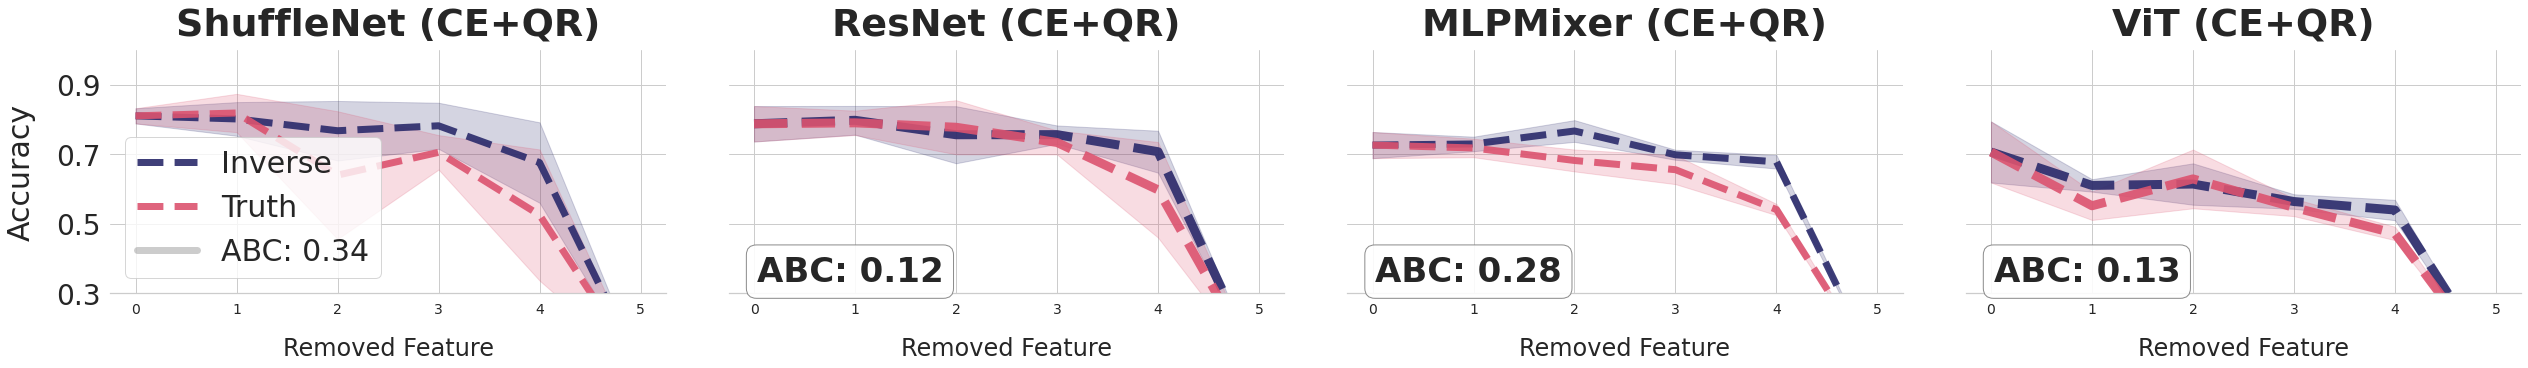

In [25]:

fig, axes = plt.subplots(1, 4, figsize=(35, 5), 
                                gridspec_kw={'wspace':0.1},
                                constrained_layout=True, sharey=False)
title_font_size = 38 
linewidth = 9
dashlinewidth = 7

sns.lineplot(data=ms_data[1][1][ms_data[1][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=ms_data[1][1][ms_data[1][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[0], alpha=0.9,linewidth=dashlinewidth)
# # thick lines
sns.lineplot(data=ms_data[2][1][ms_data[2][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[1],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=ms_data[2][1][ms_data[2][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[1],linewidth=linewidth, alpha=0.9)        

sns.lineplot(data=ms_data[3][1][ms_data[3][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                    errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=ms_data[3][1][ms_data[3][1]['exp_type']=='important'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[2], alpha=0.9,linewidth=dashlinewidth)
sns.lineplot(data=ms_data[4][1][ms_data[4][1]['exp_type']=='unimportant'], x="feature_order", y="accuracy",
                                        errorbar='sd', label='Inverse', color='#2A2A6B', linestyle='--', ax=axes[3],linewidth=linewidth, alpha=0.9)
sns.lineplot(data=ms_data[4][1][ms_data[4][1]['exp_type']=='important'], x="feature_order", y="accuracy", 
                                        errorbar='sd', label='Truth', color='#DC536F', linestyle='--', ax=axes[3],linewidth=linewidth, alpha=0.9)


area_between_1 = calculate_area_between_two_lines_one_file(ms_data[1][1])
area_between_2 = calculate_area_between_two_lines_one_file(ms_data[2][1])
area_between_3 = calculate_area_between_two_lines_one_file(ms_data[3][1])
area_between_4 = calculate_area_between_two_lines_one_file(ms_data[4][1])

area_lists = [area_between_1, area_between_2, area_between_3, area_between_4]
title_lists = ['ShuffleNet (CE+QR)', 'ResNet (CE+QR)', 'MLPMixer (CE+QR)', 'ViT (CE+QR)']

for j in range(4):
      # remove legend
      axes[j].legend().remove()
      
      axes[j].set_xlabel('Removed Features', fontsize=16)
      axes[j].set_ylim(0.7, 1.0)
      axes[j].spines[["top"]].set_visible(False)
      axes[j].tick_params(axis='x', labelsize=14)
      # add a pseudo legend like a box for area_between
      axes[j].plot(0, 0, label=f"ABC: {area_lists[j]:.2f}", alpha=0.2,color='black', linewidth=3)
      axes[j].legend(title='', loc='lower left', fontsize=30, )
      leg = axes[j].get_legend()
      for line in leg.get_lines():
            line.set_linewidth(7)
      if j in [0]:
            pass 
      else:
            # remove legend
            axes[j].legend().remove()
            axes[j].annotate(f"ABC: {area_lists[j]:.2f}", xy=(0.05, 0.05), xycoords='axes fraction', fontsize=34, fontweight='bold',
                              bbox=dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9))
      # set x ticks
      axes[j].set_xticks([0, 1, 2, 3, 4, 5])
      # set y ticks
      axes[j].set_yticks([0.3, 0.5, 0.7, 0.9])
      axes[j].set_ylabel('')
      # remove x tick labels and labels
      # axes[i][j].set_xticklabels([])

      axes[j].set_title(title_lists[j], fontsize=title_font_size, pad=15, fontweight='bold')
      # handles, labels = axes[j].get_legend_handles_labels()
      # axes[j].legend(handles[2:], labels[2:], title='', loc='lower left', fontsize=30)
      # leg = axes[j].get_legend()
      # for line in leg.get_lines():
      #       line.set_linewidth(5)
      axes[j].set_xlabel('Removed Feature', fontsize=24, labelpad=20)

      if j == 0:
            axes[j].set_ylabel('Accuracy', fontsize=30, labelpad=20)
            axes[j].set_yticklabels([0.3, 0.5, 0.7, 0.9], fontsize=28)
      else:
            axes[j].set_ylabel('')
            axes[j].set_yticklabels([])
      # remove top left right spine
      axes[j].spines[["top", "right", "left"]].set_visible(False)
      # annotate
      # axes[j].annotate('A', xy=(0.01, 0.95), xycoords='axes fraction', fontsize=40, fontweight='bold')


plt.savefig('results/roar/Paper_MS_mine2.png', dpi=300, bbox_inches='tight')

